In [2]:
# Código adaptado em Jupyter Notebook com base nos materiais disponibilizados pelo professor, juntamente com exemplos do próprio TensorFlow. 
# O TensorFlow é uma biblioteca popular para aprendizado de máquina e pode ser encontrado na sua documentação oficial.
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1024

Especifique cada caminho


In [3]:
dataset = 'model/gesture_sign_classifier/gesture_sign_history.csv'
model_save_path = 'model/gesture_sign_classifier/gesture_sign_classifier.keras'

Configuração do número de classificação

In [4]:
NUM_CLASSES = 36

Comprimento de entrada

In [5]:
TAMANHO_DATA = (966 * 4)


Carregar dados de aprendizagem



In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TAMANHO_DATA) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
# Dividindo os dados em 70% treino e 30% (teste + validação)
X_train, X_test_val, y_train, y_test_val = train_test_split(X_dataset, y_dataset, train_size=0.70, random_state=RANDOM_SEED)

# Dividindo os 30% em 15% validação e 15% teste
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=RANDOM_SEED)

# Exibindo a quantidade de dados em cada conjunto
print(f'Tamanho do conjunto de treino: {len(X_train)}')
print(f'Tamanho do conjunto de validação: {len(X_val)}')
print(f'Tamanho do conjunto de teste: {len(X_test)}')

Tamanho do conjunto de treino: 9811
Tamanho do conjunto de validação: 2103
Tamanho do conjunto de teste: 2103


Construção de modelo

In [9]:


model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(TAMANHO_DATA, )),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=RANDOM_SEED),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


c:\Users\Guilherme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,978,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,147,748 (8.19 MB)

 Trainable params: 2,147,748 (8.19 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Callback para checkpoint do modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(
  model_save_path, verbose=1, save_weights_only=False)

#Callback para parada antecipada
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
#Compilação do modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



Treinamento do modelo

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/50
152/154 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1536 - loss: 3.0912
Epoch 1: saving model to model/gesture_sign_classifier/gesture_sign_classifier.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1554 - loss: 3.0810 - val_accuracy: 0.6353 - val_loss: 1.1426
Epoch 2/50
152/154 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4961 - loss: 1.4374
Epoch 2: saving model to model/gesture_sign_classifier/gesture_sign_classifier.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4971 - loss: 1.4342 - val_accuracy: 0.7779 - val_loss: 0.6071
Epoch 3/50
152/154 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6644 - loss: 0.9373
Epoch 3: saving model to model/gesture_sign_classifier/gesture_sign_classifier.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6649 - loss: 0.9358 - val_accuracy: 0.8526 - val_loss: 0.3726
Epoch 4/50
151/154 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7452 - loss: 0.7033
Epoch 4: saving model to model/gesture_sign

In [14]:
# Carregamento do modelo salvo
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Teste de inferência
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0.0000000e+00 1.0729748e-37 5.3615387e-26 0.0000000e+00 1.0384582e-26
 2.3391351e-15 4.1290682e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.5228155e-14 0.0000000e+00 3.0753894e-24 0.0000000e+00 3.1755122e-36
 7.9207536e-27 3.7393998e-28 4.4964463e-32 3.9844075e-16 1.3974053e-16
 2.0915821e-34 1.7987907e-26 3.7370042e-28 1.3196417e-28 3.2590161e-26
 3.0592899e-31 3.9571857e-17 0.0000000e+00 5.8753851e-29 3.1583714e-35
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3504994e-26 1.0000000e+00
 0.0000000e+00]
34


Linhas mistas

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


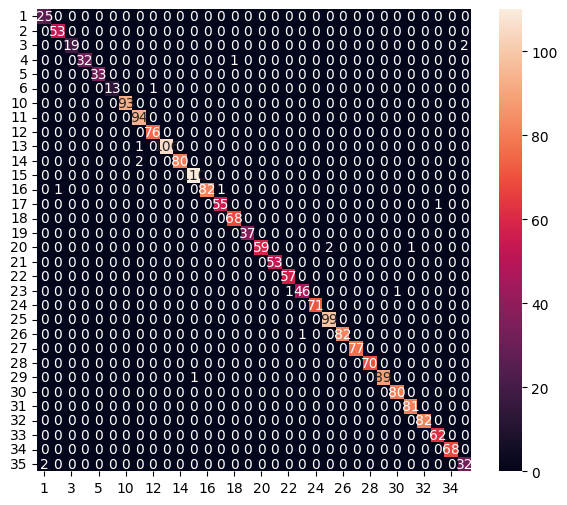

Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        25
           2       0.98      1.00      0.99        53
           3       1.00      0.90      0.95        21
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00        33
           6       1.00      0.93      0.96        14
          10       1.00      1.00      1.00        93
          11       0.97      1.00      0.98        94
          12       0.99      1.00      0.99        76
          13       1.00      0.99      1.00       107
          14       1.00      0.98      0.99        82
          15       0.99      1.00      1.00       110
          16       1.00      0.98      0.99        84
          17       0.98      0.98      0.98        56
          18       0.99      1.00      0.99        68
          19       1.00      1.00      1.00        37
          20       1.00      0.95      0.98        62
     

In [16]:
#O código abaixo foi adaptado a partir da seguinte resposta do Stack Overflow:
# Fonte: Stack Overflow Users. (2018). Stack Overflow. 
# Retrieved from https://stackoverflow.com/questions/50443411/how-to-load-a-tflite-model-in-script
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

Converter em modelo para Tensorflow-Lite

In [17]:
# Salvando como modelo apenas para inferência
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [18]:
tflite_save_path = 'model/gesture_sign_classifier/gesture_sign_classifier.tflite'

In [19]:
#Codigo adaptado a partir da documentação do tensoflow
#Fonte: MediaPipe Authors. (2020). MediaPipe Python (Version 2.0) [Source code]. Retrieved from https://www.tensorflow.org/lite/convert?hl=pt-br


# Exportar o modelo Keras para o formato de modelo salvo
model.export("saved_model")

# Converter o modelo salvo para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

# Salvar o modelo TensorFlow Lite em um arquivo
with open(tflite_save_path, "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3864), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  2169029054288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029055248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029056016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029056976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029057168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029058128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029057936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169029058896: TensorSpec(shape=(), dtype=tf.resource, name=None)
